In [37]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.figure import Figure


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pip install ultralytics -q

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ—Ç—Ä–∏—Å–æ–≤–∫–∏ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
def demonstrate_train_data(image_path: str, label_path: str) -> Figure:
  # –ó–∞–≥—Ä—É–∑–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # –ö–æ–Ω–≤–µ—Ä—Ç–∞—Ü–∏—è –≤ RGB –¥–ª—è matplotlib
    h, w = image.shape[:2]

# –ß—Ç–µ–Ω–∏–µ –º–µ—Ç–æ–∫
    with open(label_path, 'r') as f:
        labels = f.readlines()

# –û—Ç—Ä–∏—Å–æ–≤–∫–∞ bounding boxes
    for label in labels:
        class_id, x_center, y_center, width, height = map(float, label.split())
        class_id = int(class_id)

    # –ö–æ–Ω–≤–µ—Ä—Ç–∞—Ü–∏—è –∏–∑ YOLO-—Ñ–æ—Ä–º–∞—Ç–∞ (–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã) –≤ –ø–∏–∫—Å–µ–ª–∏
        x_center *= w
        y_center *= h
        width *= w
        height *= h
        x1 = int(x_center - width/2)
        y1 = int(y_center - height/2)
        x2 = int(x_center + width/2)
        y2 = int(y_center + height/2)

    # –†–∏—Å—É–µ–º –ø—Ä—è–º–æ—É–≥–æ–ª—å–Ω–∏–∫ –∏ –ø–æ–¥–ø–∏—Å—å
        cv2.rectangle(image, (x1, y1), (x2, y2), colors[class_id], 2)
        cv2.putText(image, classes[class_id], (x1, y1-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors[class_id], 2)

# –í—ã–≤–æ–¥ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
    fig = plt.figure(figsize=(14,10))
    array = np.array(image)
    plt.imshow(array, cmap='gray')
    plt.colorbar()
    plt.axis('off')
    plt.close(fig)

    return fig

In [26]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ—Ç—Ä–∏—Å–æ–≤–∫–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ –¥–µ—Ç–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –∫–∞—Ä—Ç–∏–Ω–∫–∏
def detect_doors_windows(image_path: str, model, conf_threshold: float = 0.5) -> Figure:

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–Ω–∏—è —Ñ–∞–π–ª–∞
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"–§–∞–π–ª {image_path} –Ω–µ –Ω–∞–π–¥–µ–Ω!")

# –ó–∞–≥—Ä—É–∑–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("–ù–µ —É–¥–∞–ª–æ—Å—å –∑–∞–≥—Ä—É–∑–∏—Ç—å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ. –í–æ–∑–º–æ–∂–Ω–æ, –æ–Ω–æ –ø–æ–≤—Ä–µ–∂–¥–µ–Ω–æ.")
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
    results = model.predict(image, conf=0.5)
#–ü–µ—Ä–µ–±–∏—Ä–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
    for result in results:
    # –ü–æ–ª—É—á–∞–µ–º bounding boxes –≤ —Ñ–æ—Ä–º–∞—Ç–µ [x1, y1, x2, y2, conf, class_id]
        boxes = result.boxes.xyxy.cpu().numpy()  # –ö–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã –≤ –ø–∏–∫—Å–µ–ª—è—Ö
        confidences = result.boxes.conf.cpu().numpy()  # –£–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å
        class_ids = result.boxes.cls.cpu().numpy().astype(int)  # ID –∫–ª–∞—Å—Å–æ–≤


    # –§–∏–ª—å—Ç—Ä—É–µ–º —Ç–æ–ª—å–∫–æ –¥–≤–µ—Ä–∏ (class_id = 1)
        door_boxes = boxes[class_ids == 1]  # –ú–∞—Å—Å–∏–≤ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç –¥–≤–µ—Ä–µ–π
        windows_boxes = boxes[class_ids == 4]

        door_confs = confidences[class_ids == 1]  # –£–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å –¥–ª—è –¥–≤–µ—Ä–µ–π
        windows_confs = confidences[class_ids == 4]  # –£–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å –¥–ª—è –æ–∫–æ–Ω

 # –í—ã–≤–æ–¥–∏–º –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã –∏ –¥–æ–±–∞–≤–ª—è–µ–º –Ω–∞–¥–ø–∏—Å–∏
        for box, conf in zip(door_boxes, door_confs):
            x1, y1, x2, y2 = box
            print(f"–î–≤–µ—Ä—å: x1={x1:.0f}, y1={y1:.0f}, x2={x2:.0f}, y2={y2:.0f}, confidence={conf:.2f}")
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)

        # –î–æ–±–∞–≤–ª—è–µ–º —Ç–µ–∫—Å—Ç
            text = f"Door: {conf:.2f}"
            cv2.putText(image, text, (int(x1), int(y1) - 10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)

        for box, conf in zip(windows_boxes, windows_confs):
            x1, y1, x2, y2 = box
            print(f"–û–∫–Ω–æ: x1={x1:.0f}, y1={y1:.0f}, x2={x2:.0f}, y2={y2:.0f}, confidence={conf:.2f}")
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

        # –î–æ–±–∞–≤–ª—è–µ–º —Ç–µ–∫—Å—Ç
            text = f"window: {conf:.2f}"
            cv2.putText(image, text, (int(x1), int(y1) - 10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 1)

    fig = plt.figure(figsize=(14,10))
    array = np.array(image)
    plt.imshow(array, cmap='gray')
    plt.colorbar()
    plt.close(fig)

    return fig

In [ ]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –¥–ª—è –≤—Å–µ—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏–∑ –∑–∞–¥–∞–Ω–Ω–æ–π –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏ –∏ –ø–æ–º–µ—â–µ–Ω–∏—è –∏—Ö –≤ –∑–∞–¥–∞–Ω–Ω—É—é –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—é
def process_images_with_model(
    input_dir: str,
    output_dir: str,
    model,
    conf_threshold: float = 0.5,
    image_size: int = 640,
  ) -> None:

    os.makedirs(output_dir, exist_ok=True)

    image_paths = [
        os.path.join(input_dir, f)
        for f in os.listdir(input_dir)
        if f.lower().endswith(('.png', '.jpg', '.jpeg', '.webp'))
]

    results = model.predict(source=image_paths, stream=True, conf=conf_threshold, imgsz=640)

    class_colors = {
        0: (255, 0, 0),
        1: (0, 0, 255),
        4: (0, 255, 0),
}

    for result in results:
        image = cv2.imread(result.path)
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cls_id = int(box.cls[0])
            conf = float(box.conf[0])
            if cls_id in [0, 1, 4]:
                label = f"{model.names[cls_id]} {conf:.2f}"
                font_scale = 0.4
                thickness = 1
                text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
                text_origin = (x1, y1 - 5 if y1 - 5 > 10 else y1 + 15)
                color = class_colors.get(cls_id, (0, 0, 255))  # (B, G, R)

                cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
                cv2.putText(image, label, text_origin, cv2.FONT_HERSHEY_SIMPLEX, font_scale, color, thickness)

            save_path = os.path.join(output_dir, os.path.splitext(os.path.basename(result.path))[0] + ".jpg")
            cv2.imwrite(save_path, image)

–ü–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ –∏–∑ —Å–µ–±—è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç –¥–∞–Ω–Ω—ã–µ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è. –û—Ç–∫—Ä–æ–µ–º —Å–Ω–∞—á–∞–ª–∞ –∫–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏–æ–Ω–Ω—ã–π —Ñ–∞–π–ª –≤ —Ñ–æ—Ä–º–∞—Ç–µ YAML.

In [ ]:
config_path = '/content/drive/MyDrive/floorPlans.v1i.yolov11/data.yaml'
try:
    with open(config_path, 'r', encoding='utf-8') as file:
        content = file.read()
        print(content)
except FileNotFoundError:
    print(f"–§–∞–π–ª {config_path} –Ω–µ –Ω–∞–π–¥–µ–Ω")
except IOError:
    print(f"–û—à–∏–±–∫–∞ –ø—Ä–∏ —á—Ç–µ–Ω–∏–∏ —Ñ–∞–π–ª–∞ {config_path}")

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 5
names: ['bathroom', 'door', 'perimeter', 'stairs', 'window']

roboflow:
  workspace: malyshkina
  project: floorplans-r7e9l-3umdh-yewtx
  version: 1
  license: Public Domain
  url: https://universe.roboflow.com/malyshkina/floorplans-r7e9l-3umdh-yewtx/dataset/1


–ö–∞–∫ –≤–∏–¥–∏–º, –¥–∞–Ω–Ω—ã–µ –≤–∫–ª—é—á–∞—é—Ç –º–µ—Ç–∫–∏ 5 –∫–ª–∞—Å—Å–æ–≤: –≤–∞–Ω–Ω–∞—è, –¥–≤–µ—Ä—å, –ø–µ—Ä–∏–º–µ—Ç—Ä, –ª–µ—Å—Ç–Ω–∏—Ü–∞ –∏ –æ–∫–Ω–æ.

–°–æ–∑–¥–∞–¥–∏–º —Å–ø–∏—Å–æ–∫ –∫–ª–∞—Å—Å–æ–≤ –∏ —Ü–≤–µ—Ç–æ–≤ –¥–ª—è –Ω–∏—Ö.

In [ ]:
# –ö–ª–∞—Å—Å—ã –∏ —Ü–≤–µ—Ç–∞ –¥–ª—è –Ω–∏—Ö
classes = ['bathroom', 'door', 'perimeter', 'stairs', 'window']  # –ü—Ä–∏–º–µ—Ä –Ω–∞–∑–≤–∞–Ω–∏–π –∫–ª–∞—Å—Å–æ–≤
colors = [(0,255,0), (255,0,0), (0,0,255), (255,255,0), (128,0,128)]  # –ó–µ–ª–µ–Ω—ã–π, –ö—Ä–∞—Å–Ω—ã–π, –°–∏–Ω–∏–π –∏ —Ç.–¥.

–í—ã–≤–µ–¥–µ–º –Ω–∞ —ç–∫—Ä–∞–Ω –æ–¥–Ω–æ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Å —Ä–∞–∑–º–µ—á–µ–Ω–Ω—ã–º–∏ –æ–±—ä–µ–∫—Ç–∞–º–∏.

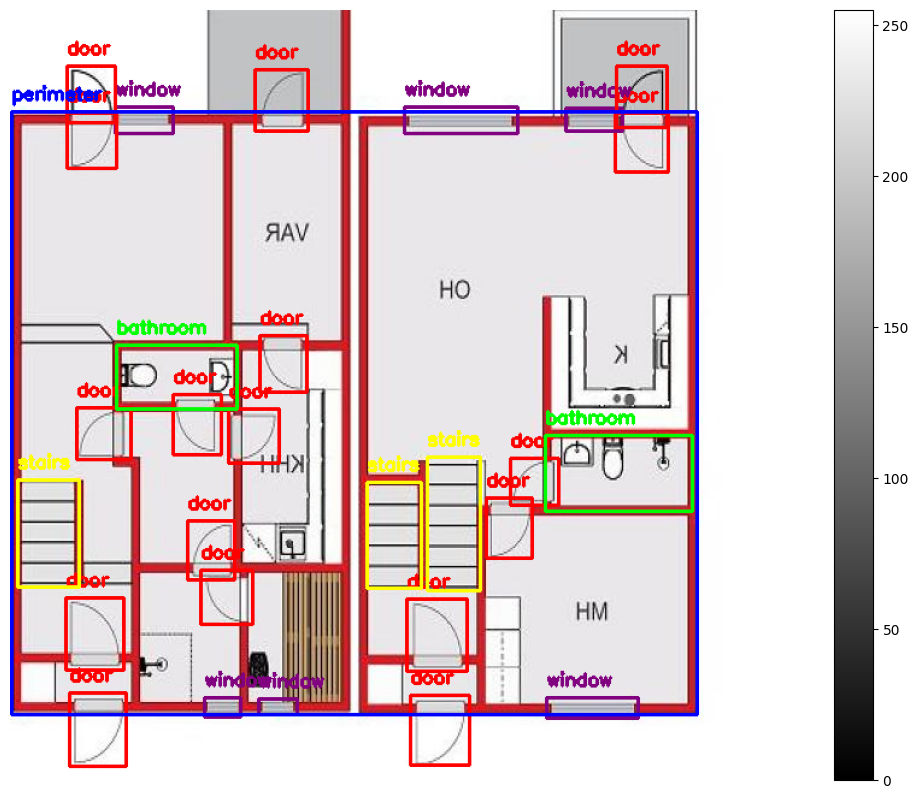

In [36]:
# –ü—É—Ç–∏ –∫ —Ñ–∞–π–ª–∞–º
image_path = "/content/drive/MyDrive/floorPlans.v1i.yolov11/train/images/0_png.rf.b5c879b0661aad6d3af8a87f8c959b85.jpg"
label_path = "/content/drive/MyDrive/floorPlans.v1i.yolov11/train/labels/0_png.rf.b5c879b0661aad6d3af8a87f8c959b85.txt"

demonstrate_train_data(image_path, label_path)

–¢–µ–ø–µ—Ä—å –æ–±—É—á–∏–º –º–æ–¥–µ–ª—å yolo11n.pt –Ω–∞ —ç—Ç–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö,

—á–∏—Å–ª–æ —ç–ø–æ—Ö  - 100,

–ø–∞—Ä–∞–º–µ—Ç—Ä patience - 10 (–µ—Å–ª–∏ –≤ —Ç–µ—á–µ–Ω–∏–µ 10 —ç–ø–æ—Ö –ø–æ–¥—Ä—è–¥ –Ω–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç —É–ª—É—á—à–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫–∏, –æ–±—É—á–µ–Ω–∏–µ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –æ—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ—Ç—Å—è).

In [ ]:
model = YOLO("yolo11n.pt")
results = model.train(
    data="/content/drive/MyDrive/floorPlans.v1i.yolov11/data.yaml",
    epochs=100,
    patience=10,
    imgsz=640)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.35M/5.35M [00:00<00:00, 73.5MB/s]


Ultralytics 8.3.161 üöÄ Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/floorPlans.v1i.yolov11/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=T

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 755k/755k [00:00<00:00, 18.6MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

  8                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1    249728  ultralytics.nn.modules.block.C2PSA           [256, 256, 1]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1    111296  ultralytics.nn.modules.block.C3k2            [384, 128, 1, False]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1     32096  ultralytics.nn.modules.block.C3k2            [256,

train: Scanning /content/drive/MyDrive/floorPlans.v1i.yolov11/train/labels.cache... 591 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 591/591 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 0.5¬±0.1 ms, read: 0.1¬±0.0 MB/s, size: 39.0 KB)


val: Scanning /content/drive/MyDrive/floorPlans.v1i.yolov11/valid/labels.cache... 56 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 56/56 [00:00<?, ?it/s]

Plotting labels to runs/detect/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.481      3.484      1.282        425        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [09:23<00:00, 15.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:56<00:00, 28.10s/it]

                   all         56       1180     0.0147      0.274      0.164      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.314       1.85      1.146        286        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:46<00:00, 14.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:21<00:00, 10.80s/it]

                   all         56       1180      0.585      0.268      0.454      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.254      1.246       1.12        315        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [09:01<00:00, 14.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:20<00:00, 10.41s/it]

                   all         56       1180      0.529      0.627      0.617       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.184      1.064      1.088        373        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [09:14<00:00, 14.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:23<00:00, 11.91s/it]

                   all         56       1180      0.621      0.673      0.669      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.138     0.9674      1.063        324        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:59<00:00, 14.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:22<00:00, 11.17s/it]

                   all         56       1180      0.672      0.686        0.7      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      1.105     0.9173      1.046        516        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:57<00:00, 14.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:23<00:00, 11.86s/it]

                   all         56       1180      0.748      0.649      0.691      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      1.097     0.8757      1.041        362        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [09:04<00:00, 14.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:21<00:00, 10.95s/it]

                   all         56       1180      0.745      0.694      0.726      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      1.067     0.8352      1.034        491        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:38<00:00, 14.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:20<00:00, 10.31s/it]

                   all         56       1180      0.746      0.751      0.777      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      1.045     0.8246      1.035        472        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:31<00:00, 13.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:21<00:00, 10.81s/it]

                   all         56       1180      0.798      0.756      0.796      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      1.064     0.8074      1.032        380        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [09:03<00:00, 14.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:22<00:00, 11.45s/it]

                   all         56       1180      0.823      0.726      0.777      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      1.041     0.7875      1.025        393        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:39<00:00, 14.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:21<00:00, 10.79s/it]

                   all         56       1180      0.802      0.757      0.811      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      1.038     0.7652      1.008        301        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:46<00:00, 14.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:23<00:00, 11.56s/it]

                   all         56       1180      0.859      0.741      0.828      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      1.007     0.7424      1.001        401        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:50<00:00, 14.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:22<00:00, 11.12s/it]

                   all         56       1180       0.79      0.745      0.779      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      1.004     0.7276     0.9999        337        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:51<00:00, 14.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:19<00:00,  9.85s/it]

                   all         56       1180      0.778      0.771      0.796      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G     0.9875     0.7225      1.003        340        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:49<00:00, 14.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:22<00:00, 11.19s/it]

                   all         56       1180      0.793      0.738      0.803      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G     0.9815     0.6987     0.9989        440        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:53<00:00, 14.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:22<00:00, 11.08s/it]

                   all         56       1180      0.804      0.733      0.816      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      0.973     0.6864     0.9924        499        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:52<00:00, 14.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:19<00:00,  9.73s/it]

                   all         56       1180      0.791      0.726      0.802      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G     0.9527     0.6655     0.9749        331        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:45<00:00, 14.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:21<00:00, 10.52s/it]

                   all         56       1180      0.815      0.801      0.833      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G     0.9593     0.6675     0.9881        347        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:52<00:00, 14.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:18<00:00,  9.16s/it]

                   all         56       1180      0.802      0.745      0.781      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G     0.9442     0.6587     0.9837        293        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:45<00:00, 14.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:21<00:00, 10.83s/it]

                   all         56       1180      0.817      0.726      0.792      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G     0.9502     0.6418     0.9781        384        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [09:00<00:00, 14.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:22<00:00, 11.41s/it]

                   all         56       1180      0.823      0.798      0.835      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G     0.9397     0.6272     0.9715        436        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:50<00:00, 14.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:21<00:00, 10.77s/it]

                   all         56       1180      0.835      0.782      0.839      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G      0.933     0.6242     0.9751        366        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:48<00:00, 14.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:19<00:00,  9.71s/it]

                   all         56       1180      0.838      0.773      0.813      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G     0.9213     0.6184     0.9697        522        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:51<00:00, 14.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:20<00:00, 10.47s/it]

                   all         56       1180      0.826      0.796      0.837      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G      0.934     0.6197     0.9723        449        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:44<00:00, 14.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:20<00:00, 10.24s/it]

                   all         56       1180      0.762      0.771      0.807       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G      0.941     0.6149     0.9753        442        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:42<00:00, 14.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:19<00:00,  9.79s/it]

                   all         56       1180      0.782      0.764      0.803      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G     0.9293     0.5982     0.9732        480        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:56<00:00, 14.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:21<00:00, 10.67s/it]

                   all         56       1180      0.775      0.841      0.822      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G     0.9208       0.59     0.9685        486        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:49<00:00, 14.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:22<00:00, 11.40s/it]

                   all         56       1180      0.812      0.799      0.835      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G     0.9075     0.5828     0.9599        451        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [09:03<00:00, 14.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:20<00:00, 10.18s/it]

                   all         56       1180      0.893       0.75      0.832      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G     0.9054     0.5796     0.9619        513        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:54<00:00, 14.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:21<00:00, 10.70s/it]

                   all         56       1180      0.836      0.759      0.813      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G      0.899     0.5726     0.9591        390        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:57<00:00, 14.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:20<00:00, 10.39s/it]

                   all         56       1180      0.849      0.757       0.83      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G     0.8864     0.5643     0.9555        518        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:47<00:00, 14.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:22<00:00, 11.39s/it]

                   all         56       1180      0.812      0.799      0.845      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G     0.8964      0.564     0.9565        401        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:50<00:00, 14.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:21<00:00, 10.83s/it]

                   all         56       1180      0.846      0.775      0.822      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G     0.8827     0.5573     0.9547        435        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:48<00:00, 14.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:21<00:00, 10.60s/it]

                   all         56       1180      0.862      0.793      0.843      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G      0.877     0.5546     0.9555        354        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:48<00:00, 14.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:19<00:00,  9.86s/it]

                   all         56       1180      0.863      0.742      0.812      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G     0.8728     0.5529     0.9547        455        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:57<00:00, 14.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:22<00:00, 11.13s/it]

                   all         56       1180      0.833      0.747      0.805      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G     0.8657     0.5463     0.9526        471        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [09:02<00:00, 14.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:19<00:00,  9.66s/it]

                   all         56       1180      0.794      0.835      0.844      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G     0.8848     0.5522     0.9522        386        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:36<00:00, 13.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:20<00:00, 10.46s/it]

                   all         56       1180      0.817        0.8      0.835      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G     0.8439     0.5261     0.9427        436        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:42<00:00, 14.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:21<00:00, 10.83s/it]

                   all         56       1180      0.809      0.787      0.824      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G     0.8465     0.5274     0.9456        483        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:42<00:00, 14.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:21<00:00, 10.62s/it]

                   all         56       1180      0.867      0.752      0.825      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G     0.8344     0.5219     0.9474        369        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:40<00:00, 14.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:20<00:00, 10.26s/it]

                   all         56       1180      0.839      0.749      0.824      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G     0.8604     0.5348     0.9444        512        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:29<00:00, 13.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:22<00:00, 11.10s/it]

                   all         56       1180      0.797      0.782      0.841       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G     0.8604     0.5373     0.9465        273        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:42<00:00, 14.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:20<00:00, 10.01s/it]

                   all         56       1180      0.806      0.784      0.818      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G     0.8353     0.5156     0.9455        493        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:28<00:00, 13.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:21<00:00, 10.63s/it]

                   all         56       1180      0.832      0.825      0.858      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G     0.8379     0.5183     0.9434        435        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:44<00:00, 14.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:20<00:00, 10.00s/it]

                   all         56       1180       0.83       0.81      0.844      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G     0.8423     0.5127     0.9403        329        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:38<00:00, 14.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:20<00:00, 10.49s/it]

                   all         56       1180      0.844      0.778      0.841      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G     0.8383     0.5095     0.9343        309        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:54<00:00, 14.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:21<00:00, 10.66s/it]

                   all         56       1180      0.866      0.761      0.832      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G     0.8158     0.4994     0.9385        405        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:46<00:00, 14.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:20<00:00, 10.09s/it]

                   all         56       1180      0.862      0.784      0.836      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G     0.8339     0.5045     0.9411        411        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:36<00:00, 13.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:21<00:00, 10.58s/it]

                   all         56       1180      0.868      0.793       0.85      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G     0.8169     0.5072     0.9309        570        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:41<00:00, 14.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:22<00:00, 11.11s/it]

                   all         56       1180      0.864      0.786      0.848      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G     0.8176     0.5048     0.9387        287        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:30<00:00, 13.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:21<00:00, 10.70s/it]

                   all         56       1180      0.851      0.782      0.844      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G     0.8328     0.5046     0.9292        554        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:43<00:00, 14.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:19<00:00,  9.61s/it]

                   all         56       1180      0.899      0.756      0.845      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G     0.8141     0.4916     0.9301        521        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:39<00:00, 14.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:20<00:00, 10.08s/it]

                   all         56       1180      0.838      0.798      0.832      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G     0.8148     0.4907      0.926        287        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 37/37 [08:49<00:00, 14.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:20<00:00, 10.14s/it]

                   all         56       1180      0.849      0.802      0.853      0.634
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 44, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



54 epochs completed in 8.270 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.161 üöÄ Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:16<00:00,  8.13s/it]


                   all         56       1180      0.832      0.826      0.857      0.635
              bathroom         55         81       0.82      0.753      0.828      0.669
                  door         56        527      0.962      0.954      0.969      0.688
             perimeter         56         72          1      0.969      0.993      0.891
                stairs         12         37      0.477      0.691      0.606      0.424
                window         56        463      0.901      0.765      0.892      0.505
Speed: 2.9ms preprocess, 268.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train


In [ ]:
# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model.save('/content/drive/MyDrive/yolov11n_custom.pt')

–í—ã–≤–µ–¥–µ–º –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –≤—Å–µ—Ö –∫–ª–∞—Å—Å–æ–≤.

In [ ]:
# Validate the model
metrics = model.val()
print(metrics.box.map)

Ultralytics 8.3.161 üöÄ Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ‚úÖ (ping: 0.6¬±0.3 ms, read: 17.4¬±3.6 MB/s, size: 40.5 KB)


val: Scanning /content/drive/MyDrive/floorPlans.v1i.yolov11/valid/labels.cache... 56 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 56/56 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [00:15<00:00,  3.75s/it]


                   all         56       1180      0.832      0.826      0.857      0.635
              bathroom         55         81       0.82      0.753      0.828      0.669
                  door         56        527      0.962      0.954      0.969      0.688
             perimeter         56         72          1      0.969      0.993      0.891
                stairs         12         37      0.477      0.691      0.606      0.424
                window         56        463      0.901      0.765      0.892      0.505
Speed: 2.7ms preprocess, 244.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train2
0.6354158560088095


–î–ª—è –¥–≤–µ—Ä–µ–π –º–µ—Ç—Ä–∏–∫–∞ mAP50 –ø–æ–∫–∞–∑–∞–ª–∞ –∑–Ω–∞—á–µ–Ω–∏–µ 0.969, mAP50-95 - 0.688,

–î–ª—è –æ–∫–æ–Ω  mAP50 = 0.892, mAP50-95 = 0.505.

mAP50: —Å—Ä–µ–¥–Ω—è—è —Ç–æ—á–Ω–æ—Å—Ç—å, —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω–∞—è –ø—Ä–∏ –ø–æ—Ä–æ–≥–µ intersection over union (IoU), —Ä–∞–≤–Ω–æ–º 0,50. –≠—Ç–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏, —É—á–∏—Ç—ã–≤–∞—é—â–µ–π —Ç–æ–ª—å–∫–æ "–ª–µ–≥–∫–∏–µ" –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏—è.

mAP50-95: —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–µ–π —Ç–æ—á–Ω–æ—Å—Ç–∏, —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω–æ–µ –ø—Ä–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –ø–æ—Ä–æ–≥–æ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö IoU, –≤–∞—Ä—å–∏—Ä—É—é—â–∏—Ö—Å—è –æ—Ç 0,50 –¥–æ 0,95. –≠—Ç–æ –¥–∞–µ—Ç –ø–æ–ª–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –æ —Ä–∞–±–æ—Ç–µ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ä–∞–∑–Ω—ã—Ö —É—Ä–æ–≤–Ω—è—Ö —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏—è.


89.2% –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –æ–∫–æ–Ω –ø—Ä–∞–≤–∏–ª—å–Ω–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω—ã –∏ –∏—Ö bounding boxes (bbox) –ø–µ—Ä–µ—Å–µ–∫–∞—é—Ç—Å—è —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ –æ–∫–Ω–∞–º–∏ —Ö–æ—Ç—è –±—ã –Ω–∞ 50%.
–ú–æ–¥–µ–ª—å —Ä–µ–¥–∫–æ –ø—Ä–æ–ø—É—Å–∫–∞–µ—Ç –æ–∫–Ω–∞ (–≤—ã—Å–æ–∫–∏–π Recall) –∏ —Ä–µ–¥–∫–æ –ø—É—Ç–∞–µ—Ç –∏—Ö —Å –¥—Ä—É–≥–∏–º–∏ –æ–±—ä–µ–∫—Ç–∞–º–∏ (–≤—ã—Å–æ–∫–∏–π Precision).

–ú–æ–¥–µ–ª—å —Ö—É–∂–µ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å —Ç–æ—á–Ω—ã–º –ø–æ–∑–∏—Ü–∏–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ–º –≥—Ä–∞–Ω–∏—Ü –æ–∫–æ–Ω.
–ü—Ä–∏ —Å—Ç—Ä–æ–≥–∏—Ö —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è—Ö (IoU –æ—Ç 0.5 –¥–æ 0.95) –µ—ë —Ç–æ—á–Ω–æ—Å—Ç—å –ø–∞–¥–∞–µ—Ç –¥–æ 50.5%.
–ü—Ä–æ–±–ª–µ–º—ã:
Bounding boxes —á–∞—Å—Ç–æ –Ω–µ—Ç–æ—á–Ω—ã–µ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –æ—Ö–≤–∞—Ç—ã–≤–∞—é—Ç –æ–∫–Ω–æ –Ω–µ –ø–æ–ª–Ω–æ—Å—Ç—å—é –∏–ª–∏ –≤—ã—Ö–æ–¥—è—Ç –∑–∞ –µ–≥–æ –≥—Ä–∞–Ω–∏—Ü—ã).
–ú–æ–¥–µ–ª—å "–¥–æ–≤–æ–ª—å—Å—Ç–≤—É–µ—Ç—Å—è" –ø—Ä–∏–º–µ—Ä–Ω—ã–º –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ–º, –Ω–æ –Ω–µ –∏–¥–µ–∞–ª—å–Ω—ã–º.

In [ ]:
# —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –Ω–∞ –¥–∏—Å–∫

!cp /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/

In [ ]:
# –ó–∞–≥—Ä—É–∂–∞–µ–º –º–æ–¥–µ–ª—å –∏–∑ Google Drive
model = YOLO('/content/drive/MyDrive/best.pt')

–ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –æ—Ç –∑–∞–∫–∞–∑—á–∏–∫–∞ (–ø–æ—Ä–æ–≥ —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –∑–∞–¥–∞–¥–∏–º 0.5). –î–ª—è –∏–Ω—Ç–µ—Ä–µ—Å–∞ –¥–æ–±–∞–≤–∏–º –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∫–ª–∞—Å—Å 'bathroom' —Å —Ü–µ–ª—å—é –ø—Ä–æ–≤–µ—Ä–∫–∏, –∫–∞–∫ –º–æ–¥–µ–ª—å —Å–ø—Ä–∞–≤–∏—Ç—Å—è —Å –¥–µ—Ç–µ–∫—Ü–∏–µ–π –≤–∞–Ω–Ω–æ–π –∫–æ–º–Ω–∞—Ç—ã.

In [ ]:
input_dir = '/content/drive/MyDrive/layouts/layouts'
output_dir = '/content/drive/MyDrive/prediction_test_data'

process_images_with_model(input_dir, output_dir, model, 0.5, 640)

–ü–æ–ª—É—á–µ–Ω–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –ø–∞–ø–∫–µ prediction_test_data, –∫–æ—Ç–æ—Ä–∞—è –¥–æ—Å—Ç—É–ø–Ω–∞ –ø–æ [—Å—Å—ã–ª–∫–µ](https://drive.google.com/drive/folders/1Wz_4fUUkxI51J9WLs0VAZFoVugWbNRub?usp=sharing)

–ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ –≤—ã–≥–ª—è–¥–∏—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –¥–ª—è –æ–¥–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è.


0: 640x640 1 bathroom, 4 doors, 1 perimeter, 2 windows, 196.8ms
Speed: 5.1ms preprocess, 196.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
–î–≤–µ—Ä—å: x1=288, y1=170, x2=346, y2=232, confidence=0.95
–î–≤–µ—Ä—å: x1=371, y1=266, x2=437, y2=336, confidence=0.91
–î–≤–µ—Ä—å: x1=345, y1=615, x2=411, y2=685, confidence=0.90
–î–≤–µ—Ä—å: x1=356, y1=530, x2=427, y2=596, confidence=0.89
–û–∫–Ω–æ: x1=403, y1=57, x2=456, y2=77, confidence=0.82
–û–∫–Ω–æ: x1=453, y1=57, x2=521, y2=77, confidence=0.63


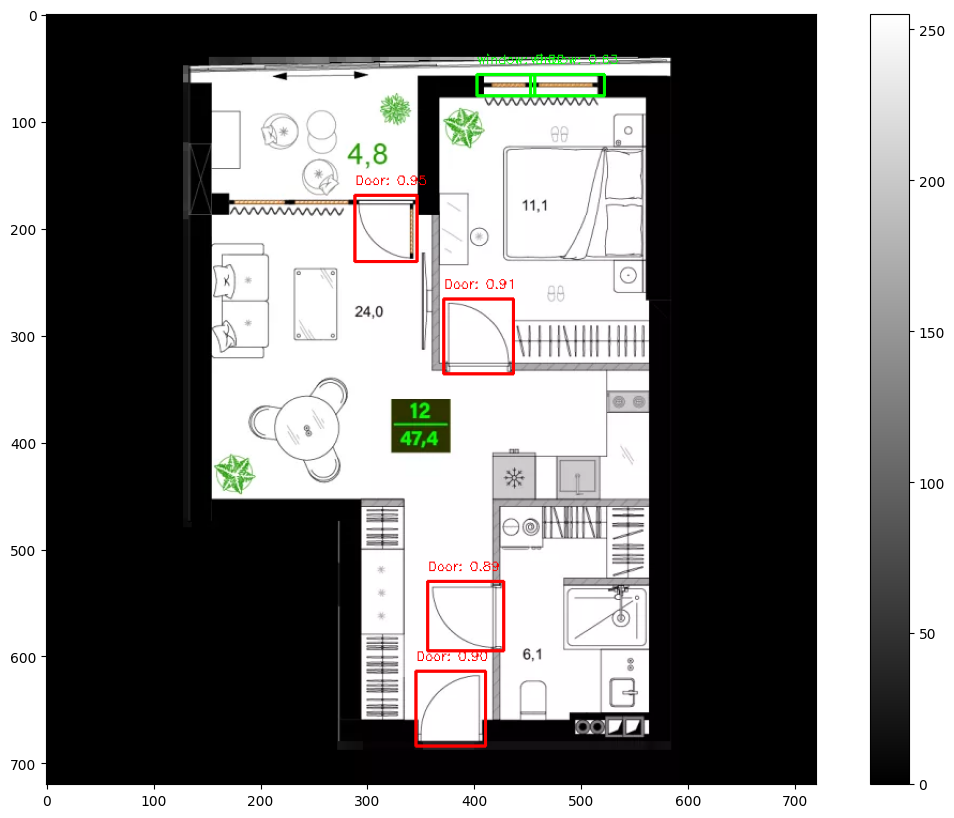

In [25]:
image_path = '/content/drive/MyDrive/layouts/layouts/4c91f13dedd67c1154fece6c33d7185f8e76f83a.webp'

detect_doors_windows(image_path, model, 0.5)